# Ejemplo-API-JSON-temperatura-humedad-indice-calor

"El índice de calor, o sensación térmica, proporciona información sobre el nivel de calor que se siente... Es una medida de la temperatura del aire en relación con la humedad relativa para un día en particular..."

Tomado de: https://www.cigna.com/es-us/knowledge-center/hw/ndice-de-calor-sth149651

Compartido por el campista Julian Valencia de C8-IA-intermedio:

API JSON de temperatura/humedad/indice de calor que transmite datos cada 30 min

14-sep-2024


In [22]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

# Paso 1: Realizar la solicitud a la API
url = 'http://idc.ventusarca.com.co/getdata2.php' # URL de la API
respuesta = requests.get(url)
# Verificar si la solicitud fue exitosa
if respuesta.status_code == 200:
  datos_json = respuesta.json() # Convertir la respuesta a JSON
# Paso 2: Convertir el JSON en un DataFrame de pandas
  dfapi = pd.DataFrame(datos_json)
# Paso 3: Visualizar los primeros registros del dataset
  dfapi.head()
# (Opcional) Guardar el dataset como un archivo CSV
  dfapi.to_csv('/content/sample_data/dataset_api_ventusarca.csv', index=False) # Guardar sin el índice
else:
  print(f"Error en la solicitud: {respuesta.status_code}")
  df1 = pd.read_csv('/content/sample_data/dataset_api_ventusarca.csv')
  df1['fecha'] = pd.to_datetime(df1['fecha'])
  df = df1.drop('id', axis=1)
  #df = df.set_index('fecha', inplace=True)

print(datos_json)
print(dfapi)

[{'id': '4757', 'fecha': '2024-09-24 21:26:50', 'temperatura': '23.6', 'humedad': '49', 'heatIndex': '23.29'}, {'id': '4756', 'fecha': '2024-09-24 20:56:49', 'temperatura': '24.5', 'humedad': '48', 'heatIndex': '24.26'}, {'id': '4755', 'fecha': '2024-09-24 20:26:48', 'temperatura': '24.4', 'humedad': '47', 'heatIndex': '24.12'}, {'id': '4754', 'fecha': '2024-09-24 19:56:47', 'temperatura': '24.5', 'humedad': '46', 'heatIndex': '24.21'}, {'id': '4753', 'fecha': '2024-09-24 19:26:46', 'temperatura': '24.9', 'humedad': '42', 'heatIndex': '24.54'}, {'id': '4752', 'fecha': '2024-09-24 18:56:45', 'temperatura': '25.4', 'humedad': '43', 'heatIndex': '25.12'}, {'id': '4751', 'fecha': '2024-09-24 18:26:45', 'temperatura': '25.8', 'humedad': '43', 'heatIndex': '25.56'}, {'id': '4750', 'fecha': '2024-09-24 17:56:44', 'temperatura': '26.3', 'humedad': '40', 'heatIndex': '26.03'}, {'id': '4749', 'fecha': '2024-09-24 17:26:43', 'temperatura': '27', 'humedad': '39', 'heatIndex': '26.81'}, {'id': '474

In [23]:
datos_json

[{'id': '4757',
  'fecha': '2024-09-24 21:26:50',
  'temperatura': '23.6',
  'humedad': '49',
  'heatIndex': '23.29'},
 {'id': '4756',
  'fecha': '2024-09-24 20:56:49',
  'temperatura': '24.5',
  'humedad': '48',
  'heatIndex': '24.26'},
 {'id': '4755',
  'fecha': '2024-09-24 20:26:48',
  'temperatura': '24.4',
  'humedad': '47',
  'heatIndex': '24.12'},
 {'id': '4754',
  'fecha': '2024-09-24 19:56:47',
  'temperatura': '24.5',
  'humedad': '46',
  'heatIndex': '24.21'},
 {'id': '4753',
  'fecha': '2024-09-24 19:26:46',
  'temperatura': '24.9',
  'humedad': '42',
  'heatIndex': '24.54'},
 {'id': '4752',
  'fecha': '2024-09-24 18:56:45',
  'temperatura': '25.4',
  'humedad': '43',
  'heatIndex': '25.12'},
 {'id': '4751',
  'fecha': '2024-09-24 18:26:45',
  'temperatura': '25.8',
  'humedad': '43',
  'heatIndex': '25.56'},
 {'id': '4750',
  'fecha': '2024-09-24 17:56:44',
  'temperatura': '26.3',
  'humedad': '40',
  'heatIndex': '26.03'},
 {'id': '4749',
  'fecha': '2024-09-24 17:26:43'

In [34]:
dfapi.head() #EDA PRIMEROS REGISTROS

,id,fecha,temperatura,humedad,heatIndex
0,4757,2024-09-24 21:26:50,23.6,49,23.29
1,4756,2024-09-24 20:56:49,24.5,48,24.26
2,4755,2024-09-24 20:26:48,24.4,47,24.12
3,4754,2024-09-24 19:56:47,24.5,46,24.21
4,4753,2024-09-24 19:26:46,24.9,42,24.54


In [35]:
dfapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4000 non-null   object
 1   fecha        4000 non-null   object
 2   temperatura  4000 non-null   object
 3   humedad      4000 non-null   object
 4   heatIndex    4000 non-null   object
dtypes: object(5)
memory usage: 156.4+ KB


In [36]:
dfapi.describe()

,id,fecha,temperatura,humedad,heatIndex
count,4000,4000,4000,4000,4000
unique,4000,4000,110,59,840
top,4757,2024-09-24 21:26:50,21.9,54,24.53
freq,1,1,102,167,18


In [37]:
# Contar valores nulos en cada columna
dfapi.isnull().sum()


,0
id,0
fecha,0
temperatura,0
humedad,0
heatIndex,0


In [38]:
# Contar valores únicos en una columna específica
dfapi['temperatura'].value_counts()

,count
temperatura,
21.9,102
24.4,94
22.4,89
19.7,86
23.9,84
...,...
28.7,1
29.1,1
29.2,1


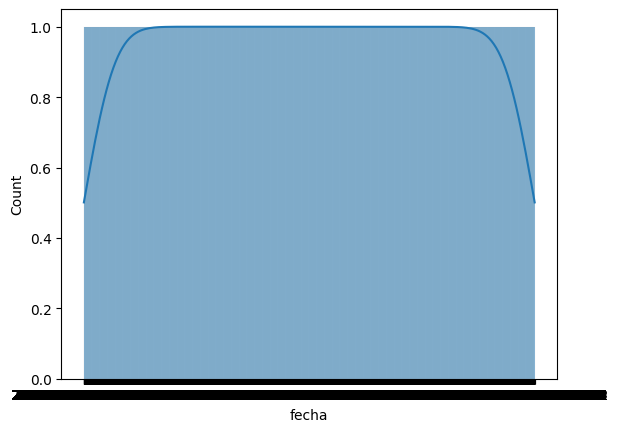

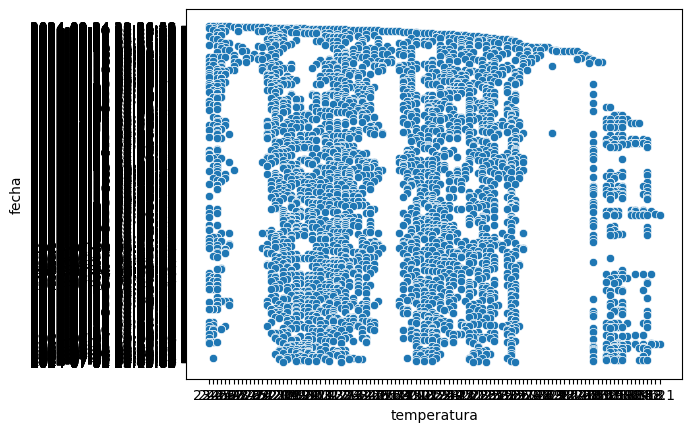

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para ver la distribución de una columna
sns.histplot(dfapi['fecha'], kde=True)
plt.show()

# Diagrama de dispersión entre dos columnas
sns.scatterplot(x='temperatura', y='fecha', data=dfapi)
plt.show()


MATRIX DE CORRELACION


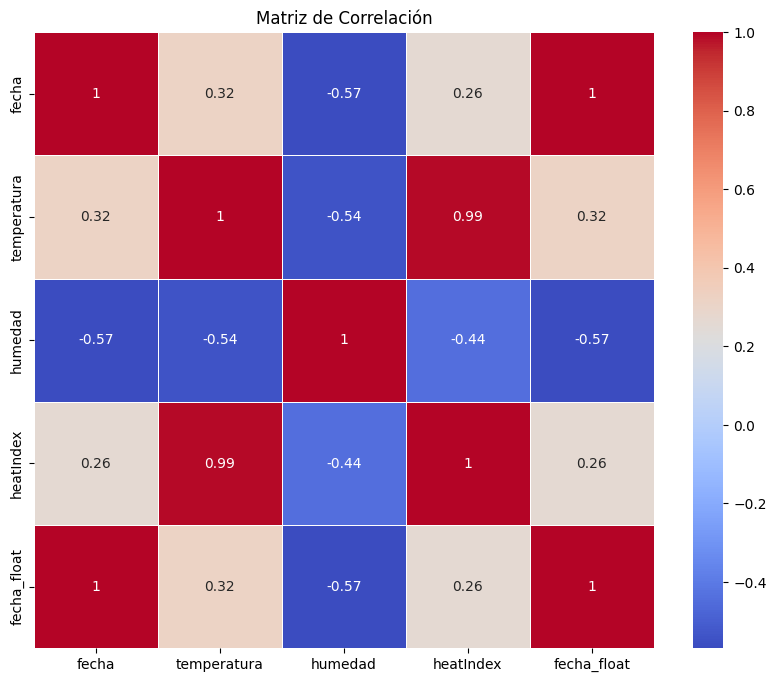

                fecha temperatura humedad heatIndex   fecha_float
0 2024-09-24 21:26:50        23.6      49     23.29  1.727213e+09
1 2024-09-24 20:56:49        24.5      48     24.26  1.727211e+09
2 2024-09-24 20:26:48        24.4      47     24.12  1.727210e+09
3 2024-09-24 19:56:47        24.5      46     24.21  1.727208e+09
4 2024-09-24 19:26:46        24.9      42     24.54  1.727206e+09


In [47]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import seaborn as sns

# Paso 1: Realizar la solicitud a la API
url = 'http://idc.ventusarca.com.co/getdata2.php'  # URL de la API
respuesta = requests.get(url)

# Verificar si la solicitud fue exitosa
if respuesta.status_code == 200:
    datos_json = respuesta.json()  # Convertir la respuesta a JSON

    # Paso 2: Convertir el JSON en un DataFrame de pandas
    dfapi = pd.DataFrame(datos_json)

    # Convertir la columna 'fecha' a datetime si existe
    if 'fecha' in dfapi.columns:
        dfapi['fecha'] = pd.to_datetime(dfapi['fecha'])

    # Paso 3: Convertir la fecha a número flotante
    # Convertir la fecha a float (segundos desde 1970-01-01)
    dfapi['fecha_float'] = dfapi['fecha'].astype('int64') / 1e9

    # Eliminar cualquier otra columna no deseada, como 'id' si es necesario
    if 'id' in dfapi.columns:
        dfapi = dfapi.drop('id', axis=1)

    # (Opcional) Guardar el dataset como un archivo CSV
    dfapi.to_csv('/content/sample_data/dataset_api_ventusarca.csv', index=False)

    # Paso 4: Crear la matriz de correlación
    correlation_matrix = dfapi.corr()

    # Paso 5: Visualizar la matriz de correlación con un mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlación')
    plt.show()

else:
    # Si falla la solicitud a la API, cargar un CSV
    print(f"Error en la solicitud: {respuesta.status_code}")
    df1 = pd.read_csv('/content/sample_data/dataset_api_ventusarca.csv')
    df1['fecha'] = pd.to_datetime(df1['fecha'])
    df1 = df1.drop('id', axis=1)

    # Crear la columna de fecha como float
    df1['fecha_float'] = df1['fecha'].astype('int64') / 1e9

    # Matriz de correlación del dataset cargado
    correlation_matrix = df1.corr()

    # Visualizar la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlación - Dataset CSV')
    plt.show()

# Mostrar los primeros registros del DataFrame
if 'dfapi' in locals():
    print(dfapi.head())


In [24]:
dfapi #original

,id,fecha,temperatura,humedad,heatIndex
0,4757,2024-09-24 21:26:50,23.6,49,23.29
1,4756,2024-09-24 20:56:49,24.5,48,24.26
2,4755,2024-09-24 20:26:48,24.4,47,24.12
3,4754,2024-09-24 19:56:47,24.5,46,24.21
4,4753,2024-09-24 19:26:46,24.9,42,24.54
...,...,...,...,...,...
3995,762,2024-07-01 19:15:05,21.5,82,21.85
3996,761,2024-07-01 18:45:04,21.8,81,22.15
3997,760,2024-07-01 18:15:03,22.1,82,22.51
3998,759,2024-07-01 17:45:02,22.3,81,22.7


In [25]:
dfapi #Primer Icono : Tabla

,id,fecha,temperatura,humedad,heatIndex
0,4757,2024-09-24 21:26:50,23.6,49,23.29
1,4756,2024-09-24 20:56:49,24.5,48,24.26
2,4755,2024-09-24 20:26:48,24.4,47,24.12
3,4754,2024-09-24 19:56:47,24.5,46,24.21
4,4753,2024-09-24 19:26:46,24.9,42,24.54
...,...,...,...,...,...
3995,762,2024-07-01 19:15:05,21.5,82,21.85
3996,761,2024-07-01 18:45:04,21.8,81,22.15
3997,760,2024-07-01 18:15:03,22.1,82,22.51
3998,759,2024-07-01 17:45:02,22.3,81,22.7


In [26]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dfapi)

https://docs.google.com/spreadsheets/d/1qnhWCXgBnW_cL3dsaRvZ0_xkKL7tDOhiCmKEktb_xN8#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [27]:
dfapi # segundo icono graficos

,id,fecha,temperatura,humedad,heatIndex
0,4757,2024-09-24 21:26:50,23.6,49,23.29
1,4756,2024-09-24 20:56:49,24.5,48,24.26
2,4755,2024-09-24 20:26:48,24.4,47,24.12
3,4754,2024-09-24 19:56:47,24.5,46,24.21
4,4753,2024-09-24 19:26:46,24.9,42,24.54
...,...,...,...,...,...
3995,762,2024-07-01 19:15:05,21.5,82,21.85
3996,761,2024-07-01 18:45:04,21.8,81,22.15
3997,760,2024-07-01 18:15:03,22.1,82,22.51
3998,759,2024-07-01 17:45:02,22.3,81,22.7


In [28]:
# prompt: Mediante el marco de datos dfapi: grafico

import altair as alt

# Convert fecha to datetime objects
dfapi['fecha'] = pd.to_datetime(dfapi['fecha'])


# Create an Altair chart
chart = alt.Chart(dfapi).mark_line().encode(
    x='temperatura',
    y='fecha'
)


# Display the chart
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [29]:
dfapi # tercer icono IA

,id,fecha,temperatura,humedad,heatIndex
0,4757,2024-09-24 21:26:50,23.6,49,23.29
1,4756,2024-09-24 20:56:49,24.5,48,24.26
2,4755,2024-09-24 20:26:48,24.4,47,24.12
3,4754,2024-09-24 19:56:47,24.5,46,24.21
4,4753,2024-09-24 19:26:46,24.9,42,24.54
...,...,...,...,...,...
3995,762,2024-07-01 19:15:05,21.5,82,21.85
3996,761,2024-07-01 18:45:04,21.8,81,22.15
3997,760,2024-07-01 18:15:03,22.1,82,22.51
3998,759,2024-07-01 17:45:02,22.3,81,22.7


In [31]:
# prompt: Mediante el marco de datos dfapi: filtrar temperaturas inferiores a 20 grados en septiembre

# Convert 'fecha' column to datetime objects if it's not already
dfapi['fecha'] = pd.to_datetime(dfapi['fecha'])

# Filter for temperatures below 20 degrees in September
df_filtered = dfapi[(dfapi['temperatura'] < 20) & (dfapi['fecha'].dt.month == 9)]

# Print or use the filtered dataframe
print(df_filtered)


        id               fecha  temperatura humedad heatIndex
28    4729 2024-09-24 07:26:27         19.7      65     19.42
29    4728 2024-09-24 06:56:26         19.3      55     18.72
30    4727 2024-09-24 06:26:25         19.4      57     18.88
31    4726 2024-09-24 05:56:25         19.6      54     19.03
32    4725 2024-09-24 05:26:24         19.7      56     19.19
76    4681 2024-09-23 07:25:49         19.6      72      19.5
77    4680 2024-09-23 06:55:49         19.3      69     19.09
78    4679 2024-09-23 06:25:48         19.4      68     19.17
79    4678 2024-09-23 05:55:47         19.4      68     19.17
80    4677 2024-09-23 05:25:46         19.6      64     19.29
81    4676 2024-09-23 04:55:46         19.7      64      19.4
82    4675 2024-09-23 04:25:45         19.8      64     19.51
170   4587 2024-09-21 07:52:00         19.9      63     19.59
171   4586 2024-09-21 07:21:59         19.9      63     19.59
172   4585 2024-09-21 06:51:58         19.7      62     19.34
173   45

# Actividad:

1. Hacer un EDA al dataframe anterior
2. Explorar los tres íconos de Google Colab cuando se muestra el dataframe y mostrar los resultados


# Usando Gemini:

- Prompt:

¿Cómo se calcula el índice de calor (sensación tyérmica) basado en la temperatura y humedad?

- Respuesta (fuera de este ipynb):


## Cómo se Calcula el Índice de Calor (Sensación Térmica)

**El índice de calor** es una medida que combina la temperatura del aire y la humedad relativa para determinar cómo se siente realmente el calor en la piel humana. Es decir, te indica la sensación térmica que experimentamos, ya que la humedad hace que el sudor se evapore más lentamente, aumentando la sensación de calor.

### ¿Cómo se calcula?
El cálculo exacto del índice de calor requiere de fórmulas matemáticas complejas que involucran variables como la temperatura del bulbo seco (temperatura del aire), la temperatura del bulbo húmedo (relacionada con la humedad) y la presión atmosférica.

**Sin embargo, para un uso general**, existen tablas y calculadoras en línea que te permiten obtener una estimación del índice de calor simplemente introduciendo la temperatura y la humedad relativa.

**Ejemplo de una tabla simplificada:**

| Temperatura (°C) | Humedad Relativa (%) | Índice de Calor (°C) | Sensación |
|---|---|---|---|
| 32 | 70 | 38 | Calor incómodo |
| 35 | 80 | 42 | Muy caluroso |
| 40 | 90 | 50 | Extremo calor |

**Importante:** Los valores exactos pueden variar ligeramente según la fuente y los métodos de cálculo utilizados.

### ¿Por qué es importante el índice de calor?
* **Salud:** Ayuda a prevenir enfermedades relacionadas con el calor, como el golpe de calor.
* **Actividades al aire libre:** Permite planificar actividades al aire libre de manera segura, especialmente para personas mayores, niños y personas con enfermedades crónicas.
* **Agricultura:** Influye en el crecimiento de las plantas y en la producción agrícola.
* **Meteorología:** Es un parámetro importante en los pronósticos meteorológicos.

### ¿Dónde encontrar información sobre el índice de calor?
* **Servicios meteorológicos:** La mayoría de los servicios meteorológicos nacionales proporcionan información sobre el índice de calor en sus sitios web y aplicaciones móviles.
* **Aplicaciones móviles:** Existen numerosas aplicaciones meteorológicas que incluyen el índice de calor en sus pronósticos.
* **Noticias locales:** Los medios de comunicación suelen informar sobre el índice de calor durante las olas de calor.

**En resumen,** el índice de calor es una herramienta útil para evaluar las condiciones climáticas y tomar medidas para proteger nuestra salud. Al conocer este valor, podemos tomar decisiones informadas sobre nuestras actividades al aire libre y prevenir problemas de salud relacionados con el calor.

**¿Quieres que te ayude a encontrar una calculadora de índice de calor en línea o te proporcione más información sobre este tema?**

**Palabras clave:** índice de calor, sensación térmica, temperatura, humedad, golpe de calor, meteorología, salud.


- Respuesta (prompt usado dentro de este ipynb después de haber ejecutado todas las celdas):

El índice de calor no se puede calcular directamente usando solo la temperatura y la humedad en el conjunto de datos que proporcionaste.

El conjunto de datos ya incluye una columna llamada ic que representa el índice de calor. Si deseas calcular el índice de calor para otros valores de temperatura y humedad, necesitarías usar una fórmula o un modelo de regresión.

Puedo ayudarte a crear un modelo de regresión para estimar el índice de calor basado en la temperatura y la humedad si lo deseas.

Fuentes
www.wpc.ncep.noaa.gov/html/heatindex.shtml
www.calculator.net/heat-index-calculator.html
www.weather.gov/ama/heatindex
www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml
www.omnicalculator.com/physics/heat-index


# TAREA (intentar terminarla para las siguientes dos clases):

1. Hacer regresión múltiple para estimar el índice de calor (sensación térmica cuantitativa) en función de la temperatura y humedad.

2. Crear una columna que se llame sensación térmica para describirla cualitativamente en 5 categorías (muy baja, baja, media, alta, muy alta).

3. Con lo anterior, investigar cómo se puede estimar la categoría de la sensación térmica usando regresión logística (la cual es usada para clasificación) en dos escenarios: A) Solo teniendo en cuenta la variable índice de calor, y B) teniendo en cuenta tres variables: temperatura, humedad e índice de calor.

4. Graficar las siguientes series temporales:

- Temperatura vs Fecha
- Humedad vs Fecha
- Índice de calor vs Fecha
- Sensación térmica vs Fecha